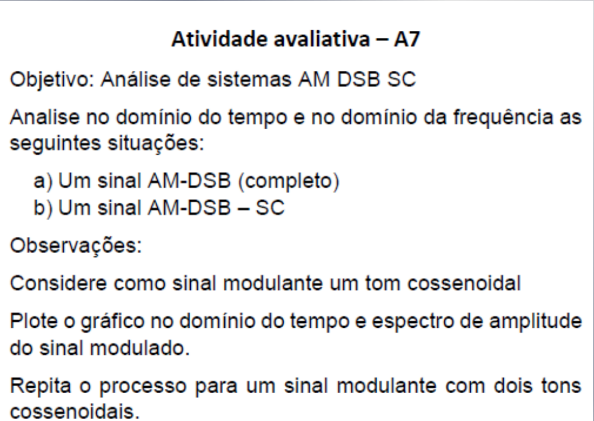

# Bibliotecas

In [2]:
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.fftpack import fft, fftfreq

# Sinais Fundamentais

In [129]:
### parâmetros do sinal ###

##Amplitude 
A = 1
A1 = 1

##Frequencia 
##Portadora
freq = 50
##Modulante
freq1 = 5

##Parametros de Sinal
Amostras_ciclo = 1000 

#Tempo inicial
t0 = 0

#Qtd de Periodos
Num_T = 5

#Periodo
T = 1/freq1

## N 
N = Num_T*Amostras_ciclo

#Fator de Modulação
#sobremodulado
u = 1.5
#normal
u1 = 0.5

##Vetor de tempo
t = np.linspace(t0,T*Num_T, Num_T*Amostras_ciclo)

# sinal portador
#w = freq
w = 2.0*np.pi*freq
X = A*np.cos(w*t)

# sinal modulante
#w1= freq1
w1 = 2.0*np.pi*freq1

## Sinal de Impulso 
func = lambda t1: np.piecewise(t1,t1>=0.05,[2,0])## Impulso que vai para t >= 0 assume um valor de 1, nos outros se torna 0 
Imp = func(t)

## Ruido Branco
Branco = np.random.uniform(-5,5,Num_T*Amostras_ciclo)

# Sinal normal
Y = A1*np.cos(w1*t)

# Sinal com impulso unitário apartir de t>= 0
Y2 = A1*np.cos(w1*t) + Imp

# Sinal com ruido branco que soma valores aleatorios ao sinal original
Y3 = A1*np.cos(w1*t) + Branco


#sinal modulado AM DSB normal
Z = A*(1+(u1*Y))*X 

#sinal modulado AM DSB impulso
Z2 = A*(1+(u1*Y2))*X 

#sinal modulado AM DSB impulso
Z3 = A*(1+(u1*Y3))*X 



#sinal modulado AM DSB SC normal
ZSc = A*Y*X 

#sinal modulado AM DSB SC impulso
ZSc2 = A*Y2*X 

#sinal modulado AM DSB SC Ruido Branco
ZSc3 = A*Y3*X 

## Graficos

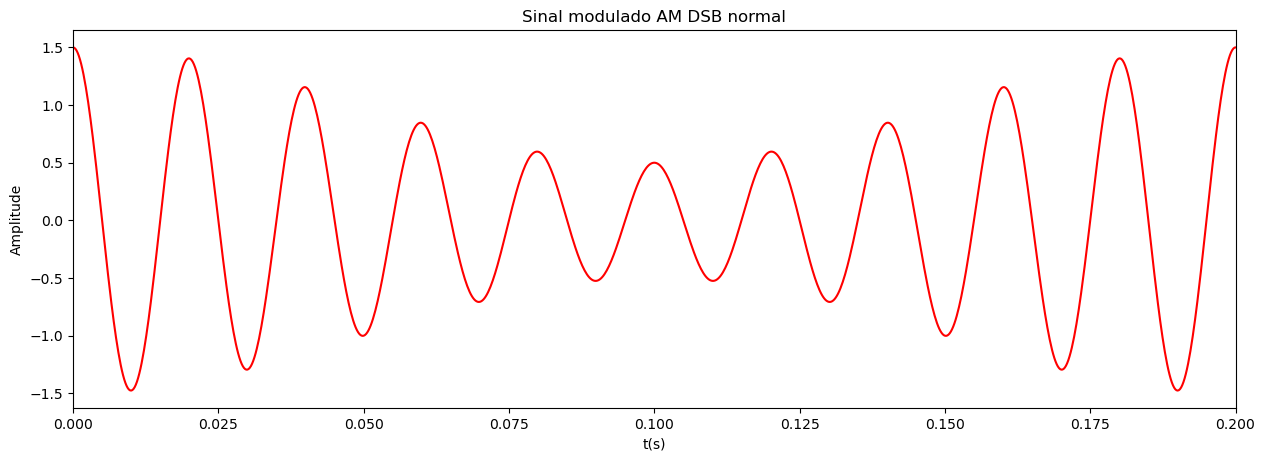

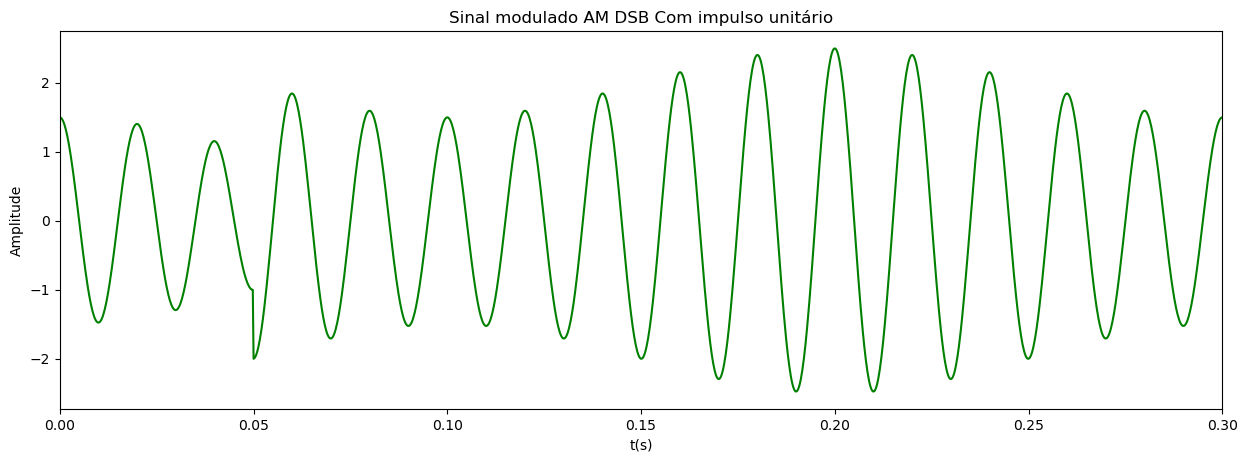

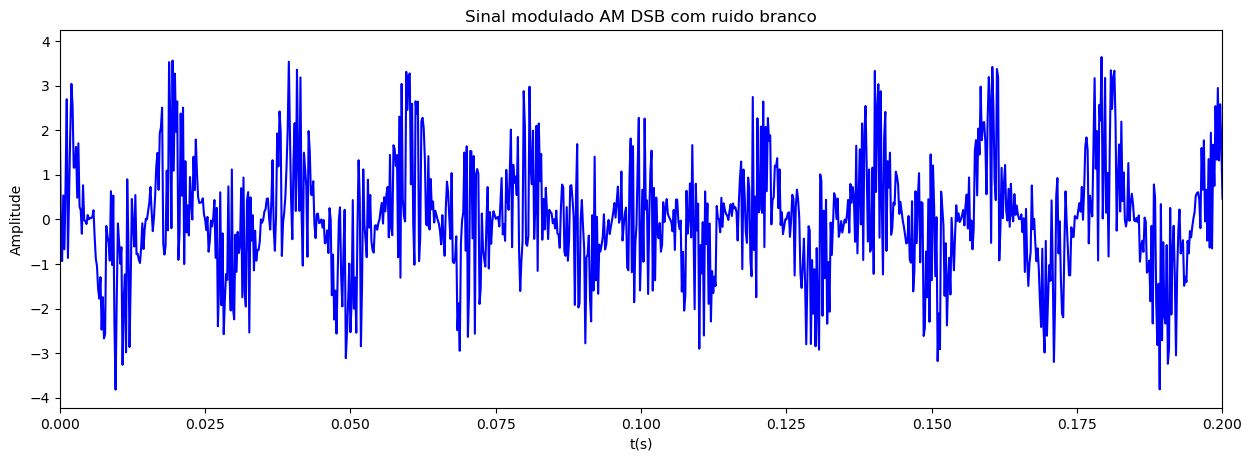

In [130]:
figure(figsize=(15, 5), dpi=100)
plt.plot(t,Z,'r')
plt.xlim(0,0.2)
plt.xlabel('t(s)')
plt.ylabel('Amplitude')
plt.title('Sinal modulado AM DSB normal')
plt.show()

figure(figsize=(15, 5), dpi=100)
plt.plot(t,Z2,'g')
plt.xlim(0,0.3)
plt.xlabel('t(s)')
plt.ylabel('Amplitude')
plt.title('Sinal modulado AM DSB Com impulso unitário')
plt.show()

figure(figsize=(15, 5), dpi=100)
plt.plot(t,Z3,'b')
plt.xlim(0,0.2)
plt.xlabel('t(s)')
plt.ylabel('Amplitude')
plt.title('Sinal modulado AM DSB com ruido branco')
plt.show()

## Transformada de Fourier

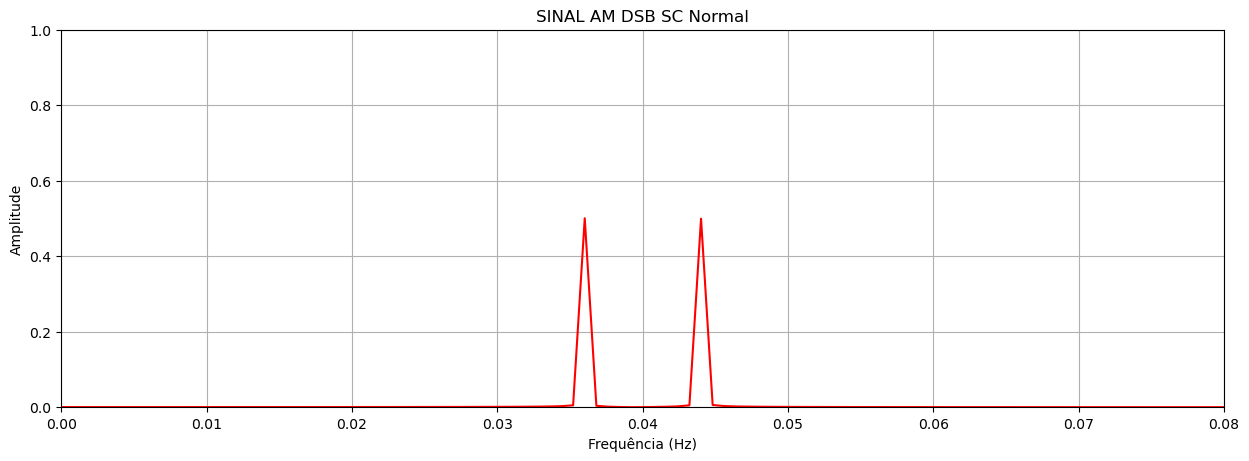

In [133]:
x = np.linspace(0.0, T*Num_T, N)
zf = scipy.fftpack.fft(ZSc)
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)

figure(figsize=(15, 5), dpi=100)
plt.xlim([0,4/freq])
plt.ylim([0,1])
plt.grid()

plt.title('SINAL AM DSB SC Normal')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.plot(xf, 2.0/N * np.abs(zf[:N//2]),'r')

plt.show()

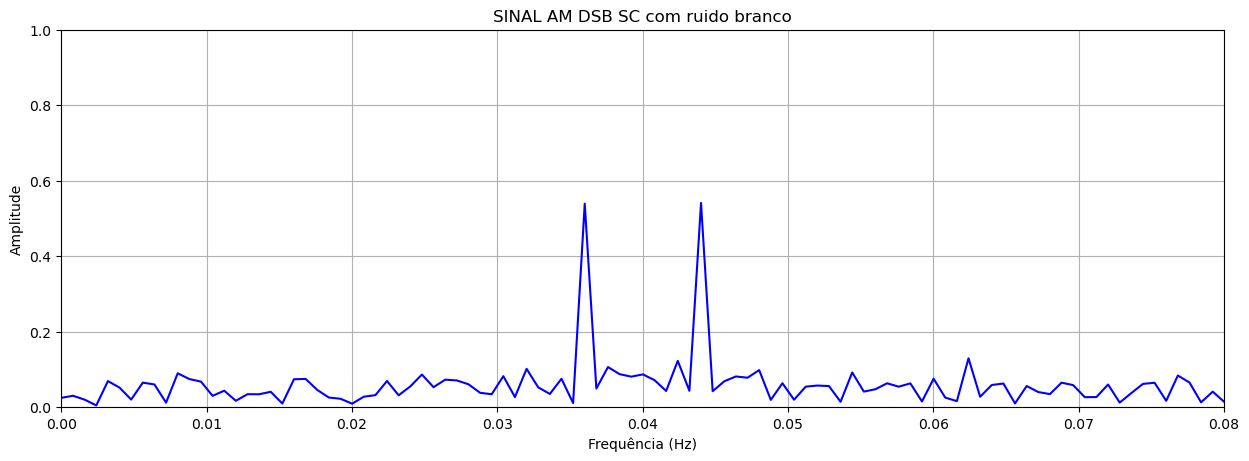

In [135]:
x = np.linspace(0.0, T*Num_T, N)
zf = scipy.fftpack.fft(ZSc3)
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)

figure(figsize=(15, 5), dpi=100)
plt.xlim([0,4/freq])
plt.ylim([0,1])
plt.grid()

plt.title('SINAL AM DSB SC com ruido branco')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")

plt.plot(xf, 2.0/N * np.abs(zf[:N//2]),'b')

plt.show()